Create a model to predict monthly cash flows. Let’s assume that the company wants to
double the revenues every month starting from 5lacs in November 2020. Assume thatnumber of
employees will grow by 50% every month.

You can take the following broad assumptions:
1. **Costs**:
a. Teacher Costs
i. Assume 250 rs per hour per teacher
ii. Assume 50 hours per teacher per month
b. Marketing Costs
i. Assume 500 rupees per new lead who will take a demo
ii. Assume 20% conversion rate from the demo lead to a paid customer
c. Employee Costs
i. Assume 8LPA per employee
d. Demo Costs
i. Assume 100 rs per hour per teacher
ii. Assume 50 demo hours per teacher per month

2. **Revenues**:
a. Assume an average selling price of Rs 300 per session
b. Assume average number of sessions sold per customer to be 32
c. Assume that a GST of 18% will be paid from the revenue generated
d. Assume all other costs such as payment gateway etc to be at 2% of the amount
paid

Your model should be able to show the following:

1. Monthly cash-in/cash-out and hence the profit/loss
2. Monthly new students added
3. Monthly marketing costs
4. Number of teachers per month
5. Customer Acquisition Cost per Month (Total Marketing Spend/Number of Students
added)
Also, please answer the following question:
1. What are your recommendations for a growth strategy that will lead to profitability?

In [1]:
import random
import pandas as pd
import numpy as np



In [2]:
# Assumptions
starting_revenue = 500000
starting_employees = 10
teacher_cost_per_hour = 250
teacher_hours_per_month = 50
marketing_cost_per_lead = 500
conversion_rate = 0.2
employee_cost = 800000
demo_cost_per_hour = 100
demo_hours_per_teacher = 50
avg_selling_price_per_session = 300
sessions_per_customer = 32
gst_rate = 0.18
other_costs_rate = 0.02

In [3]:
# Initialize variables
revenue = starting_revenue
employees = starting_employees
students_added = []
monthly_cash_in = []
monthly_cash_out = []
profit_loss = []

In [4]:
# Generate random students added for 12 months
for _ in range(12):
    students_added.append(random.randint(10, 50))

In [5]:
# Calculate monthly metrics
for i, students in enumerate(students_added):
    # Monthly revenue
    cash_in = revenue
    monthly_cash_in.append(cash_in)
    
    # Teacher costs
    teacher_costs = teacher_cost_per_hour * teacher_hours_per_month * employees
    # Marketing costs
    marketing_costs = marketing_cost_per_lead * students / conversion_rate
    # Employee costs
    employee_costs = employee_cost * employees
    # Demo costs
    demo_costs = demo_cost_per_hour * demo_hours_per_teacher * employees
    
    # Total costs
    total_costs = teacher_costs + marketing_costs + employee_costs + demo_costs
    # GST
    gst = cash_in * gst_rate
    # Other costs
    other_costs = cash_in * other_costs_rate
    
    # Monthly cash out
    cash_out = total_costs + gst + other_costs
    monthly_cash_out.append(cash_out)
    
    # Net revenue and profit/loss
    net_revenue = cash_in - cash_out
    profit_loss.append(net_revenue)
    
    # Update revenue for the next month
    revenue *= 2
    
    # Update the number of employees for the next month
    employees *= 1.5

In [6]:
# Calculate customer acquisition cost per month
cac_per_month = [marketing_costs / students for marketing_costs, students in zip(monthly_cash_out, students_added)]

In [7]:
# Create a DataFrame for monthly cash flows and metrics
data = {
    'Month': range(1, 13),
    'Cash In': monthly_cash_in,
    'Cash Out': monthly_cash_out,
    'Profit/Loss': profit_loss,
    'Students Added': students_added,
    'CAC per Month': cac_per_month
}
df = pd.DataFrame(data)

#### Growth Strategy Recommendations for Profitability:
1. `Focus on Customer Retention`: Implement strategies to enhance customer satisfaction and build long-term relationships.
2. `Increase Average Revenue per Customer`: Upsell and cross-sell additional sessions or services to existing customers.
3. `Optimize Pricing Strategy`: Regularly review pricing structures to ensure competitiveness and profitability.
4. `Streamline Operations`: Identify and eliminate inefficiencies in operations to reduce costs and improve profitability.
5. `Invest in Marketing`: Utilize targeted marketing strategies to reach a wider audience and attract new customers.
6. `Monitor Key Performance Indicators`: Continuously track and analyze KPIs such as customer acquisition cost, customer lifetime value, and profitability.


In [8]:
df.head()

,Month,Cash In,Cash Out,Profit/Loss,Students Added,CAC per Month
0,1,500000,8310000.0,-7810000.0,14,5.935714e+05
1,2,1000000,12512500.0,-11512500.0,20,6.256250e+05
2,3,2000000,18821250.0,-16821250.0,11,1.711023e+06
3,4,4000000,28500625.0,-24500625.0,44,6.477415e+05
4,5,8000000,43075937.5,-35075937.5,36,1.196554e+06


In [9]:
df.tail()

,Month,Cash In,Cash Out,Profit/Loss,Students Added,CAC per Month
7,8,64000000,1.525950e+08,-8.859504e+07,47,3.246703e+06
8,9,128000000,2.352388e+08,-1.072388e+08,49,4.800792e+06
9,10,256000000,3.655895e+08,-1.095895e+08,46,7.947597e+06
10,11,512000000,5.738992e+08,-6.189919e+07,35,1.639712e+07
11,12,1024000000,9.119475e+08,1.120525e+08,12,7.599563e+07


In [10]:
%matplotlib  inline
import matplotlib.pyplot as plt 
import seaborn as sns

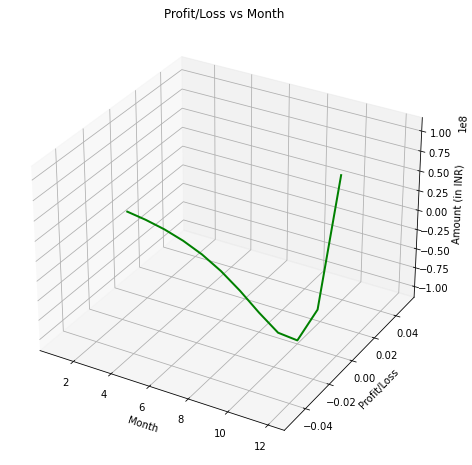

In [12]:
# Plotting profit/loss vs month in a 3D graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['Month']
y = df['Profit/Loss']
ax.set_xlabel('Month')
ax.set_ylabel('Profit/Loss')
ax.set_zlabel('Amount (in INR)')

ax.plot(x, y, zs=0, zdir='y', color='g', linewidth=2)

plt.title('Profit/Loss vs Month')
plt.show()

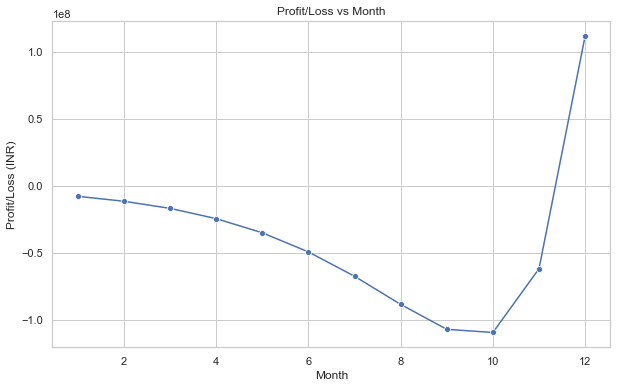

In [18]:
# Plotting profit/loss vs month using Seaborn line plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Profit/Loss', marker='o')

plt.title('Profit/Loss vs Month')
plt.xlabel('Month')
plt.ylabel('Profit/Loss (INR)')
plt.show()